In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:

df = pd.read_csv('\\Temp\Salarios.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
1,2023,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M
2,2023,SE,FT,Machine Learning Engineer,233000,USD,233000,US,0,US,M
3,2023,SE,FT,Machine Learning Engineer,166000,USD,166000,US,0,US,M
4,2023,SE,FT,Data Engineer,185100,USD,185100,US,100,US,M


In [37]:
df.shape

(4347, 11)

In [38]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [39]:
df.duplicated(subset=['work_year']).sum()

4343

Pregunta 1: ¿Qué país es el que tiene mayor cantidad de salarios?

In [40]:
df['company_location'].unique()

array(['US', 'GB', 'ES', 'CA', 'IN', 'GH', 'AR', 'SA', 'DE', 'MY', 'AU',
       'CO', 'NG', 'JP', 'FR', 'RU', 'PH', 'ZA', 'IT', 'HK', 'NL', 'CH',
       'CF', 'FI', 'UA', 'IE', 'IL', 'SG', 'SE', 'SI', 'MX', 'BR', 'PT',
       'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO',
       'PK', 'MA', 'PL', 'LT', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR',
       'PR', 'AS', 'DK', 'BO', 'BE', 'ID', 'EG', 'AE', 'LU', 'HN', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [41]:
len(df['company_location'].unique())

72

In [42]:
df.groupby('company_location').size()

company_location
AE       3
AM       1
AR       7
AS       2
AT       6
      ... 
TR       5
UA       4
US    3534
VN       1
ZA       1
Length: 72, dtype: int64

In [43]:
company_location_counts=df.groupby('company_location').size()

In [44]:
#utilicé el método to_frame para convertirla en un marco de datos.
company_location_counts=company_location_counts.to_frame()

In [45]:
#Cambio el nombre de la columna de conteo que se nombró automáticamente 0 cuando se convirtió en un marco de datos 
company_location_counts=company_location_counts.rename(columns={0:'count'})

In [46]:
#luego ordené los valores en forma descendente.
company_location_counts=company_location_counts.sort_values(by='count',ascending=False)

In [47]:
company_location_counts

,count
company_location,
US,3534
GB,221
CA,100
ES,85
IN,60
...,...
MA,1
HN,1
IR,1


C:\Users\xsxc07\AppData\Local\Temp\ipykernel_20828\3616165732.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=company_location_counts.index, rotation=90)


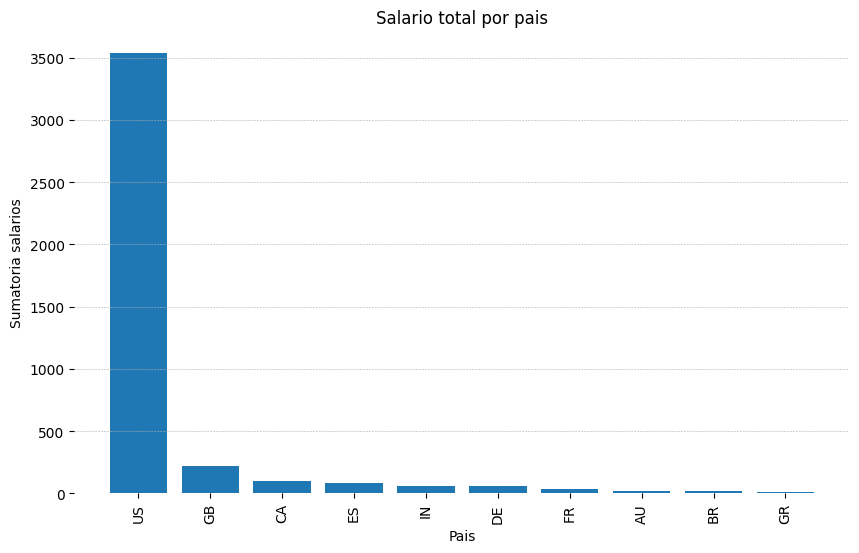

In [48]:
fig,ax2=plt.subplots(figsize=(10,6))
ax2.bar(company_location_counts.index[:10],company_location_counts['count'][:10])

[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title('Salario total por pais')
ax2.set_ylabel('Sumatoria salarios')
ax2.set_xlabel('Pais')
ax2.set_xticklabels(labels=company_location_counts.index, rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.4)
plt.show()

Pregunta 2: ¿Qué tipo de especialidad tiene la mayor cantidad de gente?

In [49]:
df['job_title'].unique()

array(['Data Analyst', 'Machine Learning Engineer', 'Data Engineer',
       'Data Scientist', 'Insight Analyst',
       'Business Intelligence Developer', 'ETL Developer',
       'Data Architect', 'ML Engineer', 'Applied Scientist',
       'Business Intelligence Engineer', 'NLP Engineer',
       'Data Specialist', 'Decision Scientist', 'Analytics Engineer',
       'Data Science Manager', 'Director of Data Science', 'Head of Data',
       'Research Scientist', 'Computer Vision Engineer',
       'Applied Machine Learning Engineer', 'Business Data Analyst',
       'Data Operations Engineer', 'Staff Data Analyst',
       'Applied Machine Learning Scientist', 'AWS Data Architect',
       'Data Manager', 'Product Data Analyst', 'BI Data Analyst',
       'Machine Learning Developer', 'Research Engineer',
       'Data Integration Specialist', 'BI Developer',
       'Data Visualization Analyst', 'Autonomous Vehicle Technician',
       'Data Modeler', 'Sales Data Analyst', 'Cloud Data Engineer',

In [50]:
df['job_title']=df['job_title'].apply(lambda x:x.replace(' ',''))

In [51]:
job_title_count=df.groupby('job_title').size()

In [52]:
job_title_count=job_title_count.to_frame()
job_title_count=job_title_count.rename(columns={0:'count'})
job_title_count=job_title_count.sort_values(by='count',ascending=False)

In [53]:
job_title_count

,count
job_title,
DataEngineer,1166
DataScientist,972
DataAnalyst,690
MachineLearningEngineer,345
AnalyticsEngineer,124
...,...
AzureDataEngineer,1
DeepLearningResearcher,1
CloudDataArchitect,1


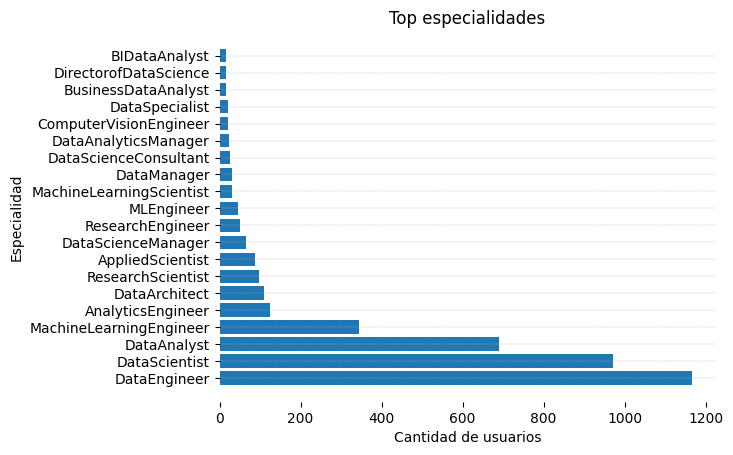

In [54]:
fig,ax4=plt.subplots()

[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(job_title_count.index[:20],job_title_count['count'][:20])
ax4.set_title('Top especialidades')
ax4.set_ylabel('Especialidad')
ax4.set_xlabel('Cantidad de usuarios')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

Pregunta 3: CUAL ES LA RELACION ENTRE EL SALARIO Y LA ESPECIALIDAD

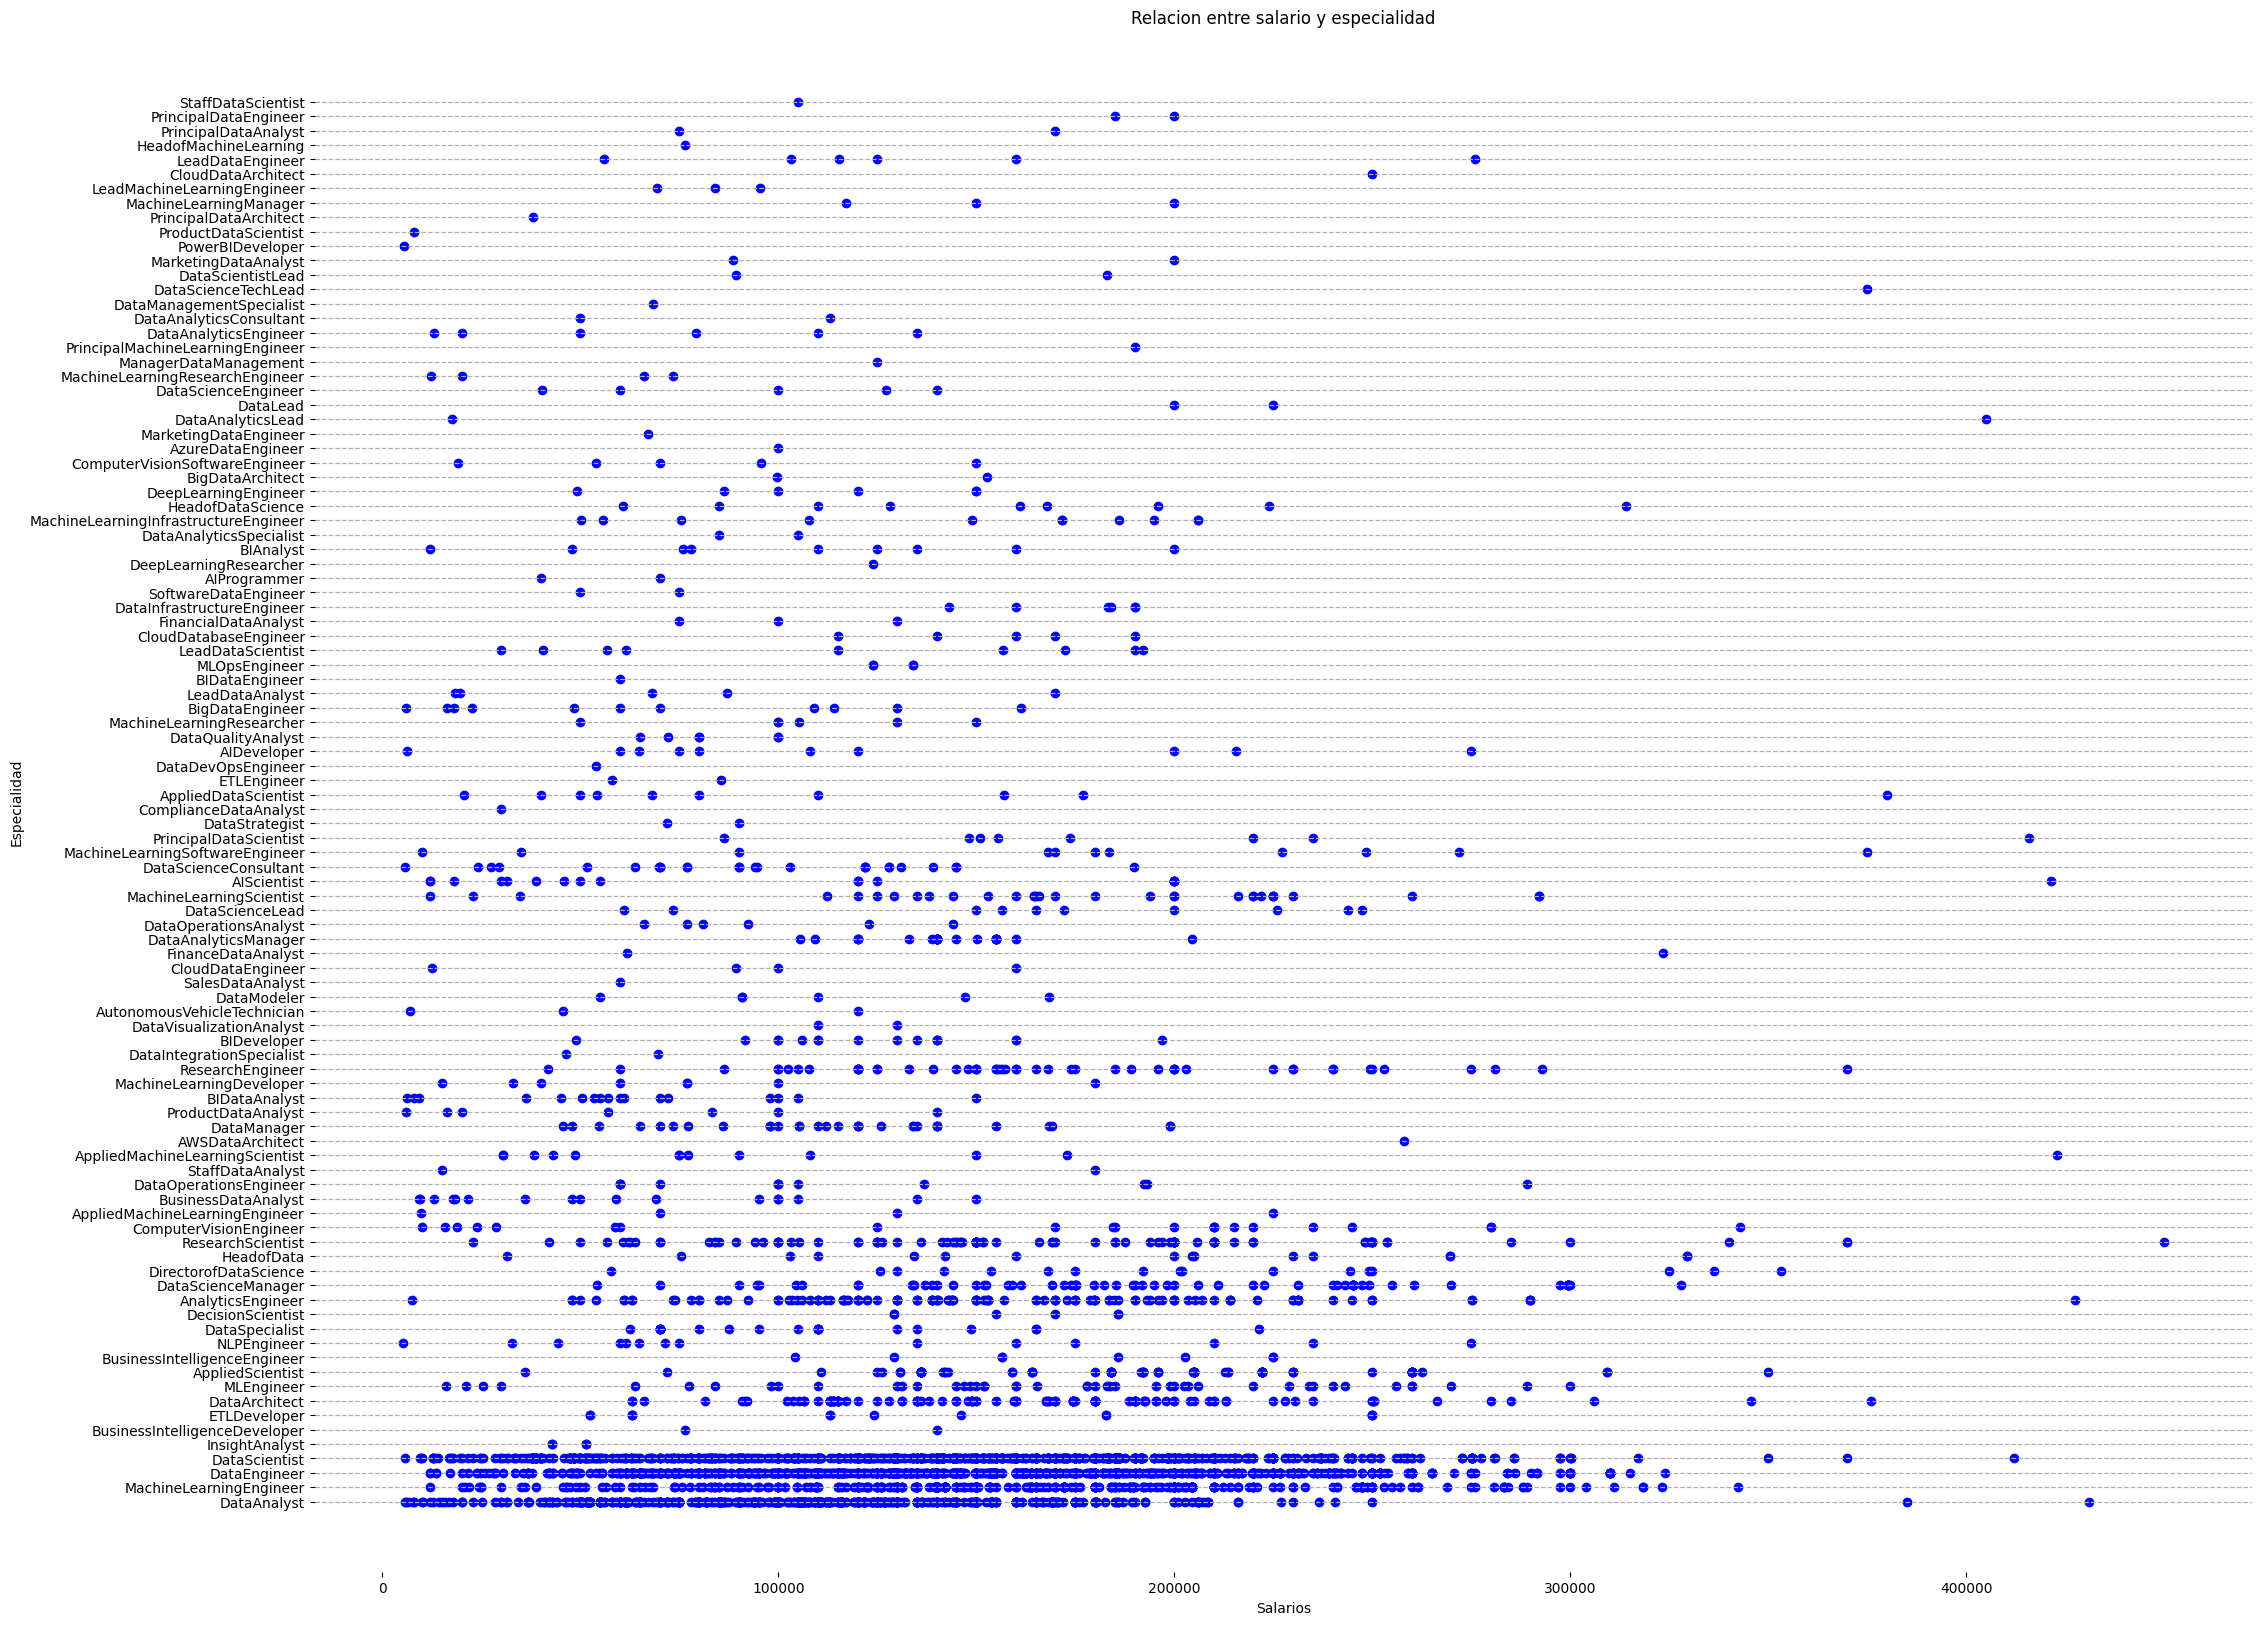

In [55]:
fig,ax5=plt.subplots(figsize=(25,20))
ax5.scatter(df['salary_in_usd'],df['job_title'],color='blue')

[s.set_visible(False) for s in ax5.spines.values()]

ax5.set_title('Relacion entre salario y especialidad')
ax5.set_xlabel('Salarios')
ax5.set_ylabel('Especialidad')
plt.grid(axis='y',linestyle='--',linewidth=0.9)
plt.show()

Pregunta 4: ¿Cual es el rango entre las distintas especialidades?

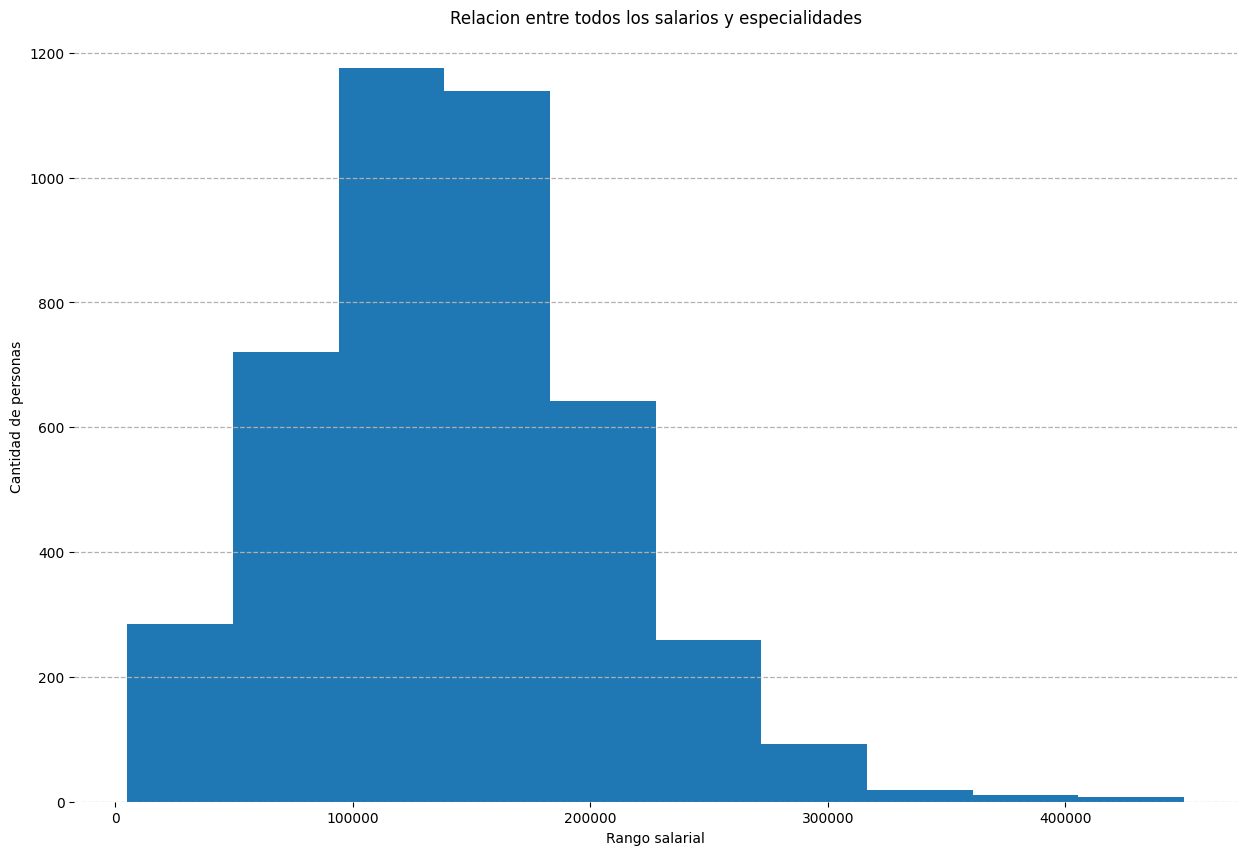

In [56]:
fig,ax6=plt.subplots(figsize=(15,10))
ax6.hist(df['salary_in_usd'])
[s.set_visible(False) for s in ax6.spines.values()]

ax6.set_title('Relacion entre todos los salarios y especialidades')
ax6.set_xlabel('Rango salarial')
ax6.set_ylabel('Cantidad de personas')
plt.grid(axis='y',linestyle='--',linewidth=0.9)
plt.show()

Pregunta 5: Cuales son los Salarios mas altos entre todas las especialidades y ciudades

In [57]:
Salarios=df.sort_values(by='salary_in_usd', ascending=False)
Salarios

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4115,2020,MI,FT,ResearchScientist,450000,USD,450000,US,0,US,M
2607,2022,MI,FT,DataAnalyst,350000,GBP,430967,GB,0,GB,M
596,2023,MI,FT,AnalyticsEngineer,350000,GBP,427539,GB,0,GB,M
4339,2021,MI,FT,AppliedMachineLearningScientist,423000,USD,423000,US,50,US,L
1124,2023,SE,FT,AIScientist,1500000,ILS,421328,IL,0,IL,L
...,...,...,...,...,...,...,...,...,...,...,...
3616,2022,MI,FT,DataAnalyst,450000,INR,5723,IN,100,IN,S
4277,2020,EN,FT,DataScienceConsultant,423000,INR,5707,IN,50,IN,M
4259,2021,MI,FT,DataScientist,420000,INR,5679,IN,100,US,S
3171,2021,EN,FT,PowerBIDeveloper,400000,INR,5409,IN,50,IN,L


c:\Users\xsxc07\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'Especialidad'

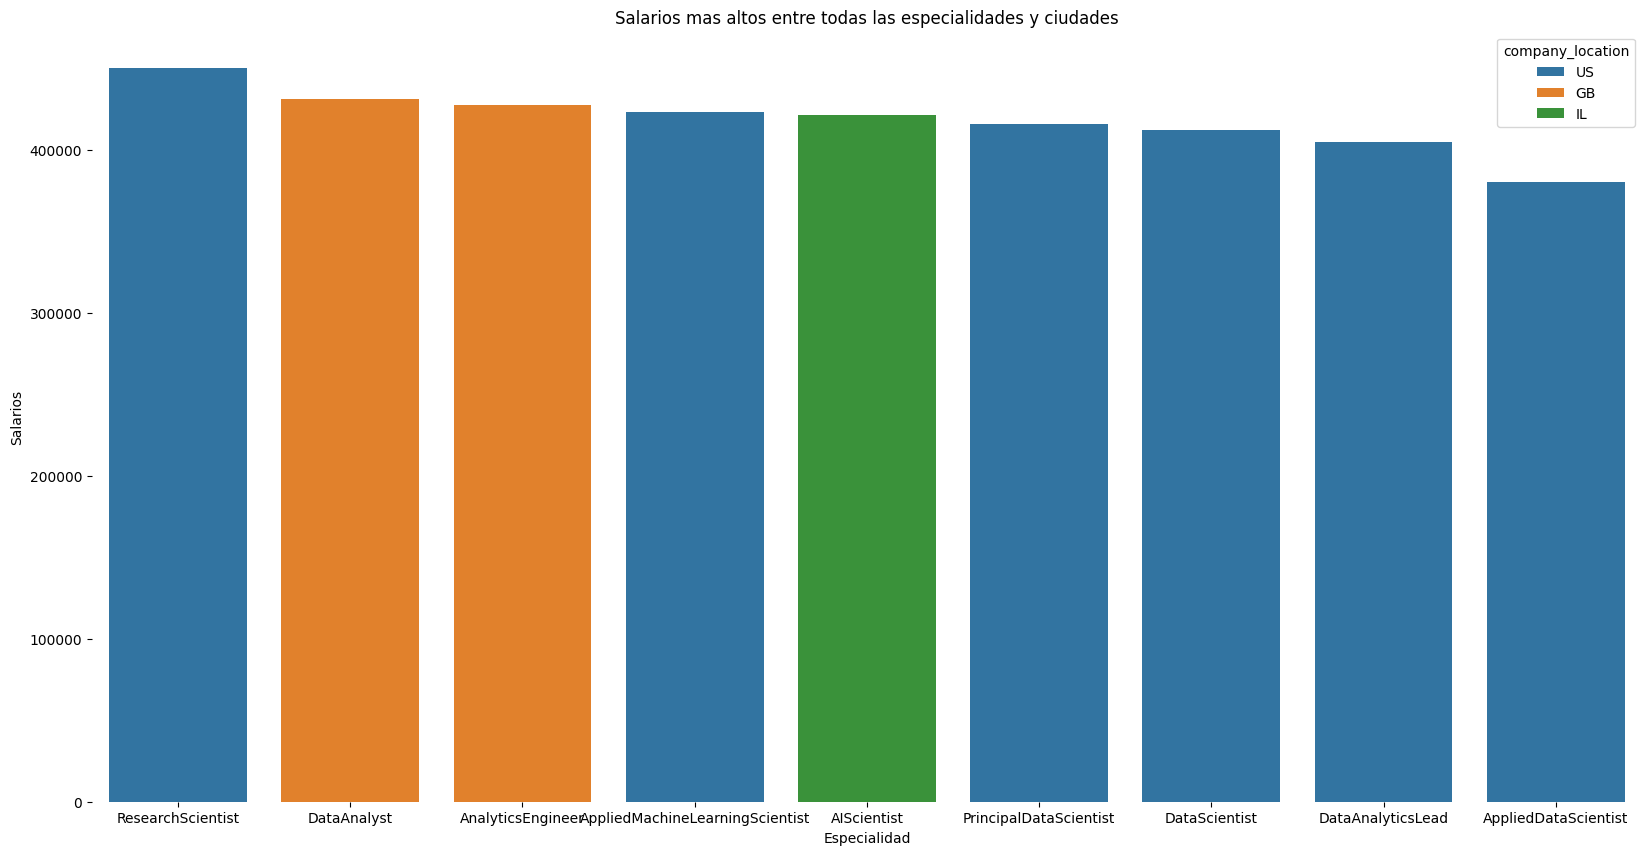

In [63]:
fig, ax7 = plt.subplots(figsize=(20,10))
sns.barplot(Salarios['job_title'][:10],Salarios['salary_in_usd'][:10],hue=Salarios['company_location'][:10],dodge=False)

[s.set_visible(False) for s in ax7.spines.values()]
ax7.set_title('Salarios mas altos entre todas las especialidades y ciudades')
ax7.set_ylabel('Salarios')
ax7.set_xlabel('Especialidad')
ax7.set_xticklabels(labels=Salarios['Especialidad'][:10], rotation=90)
ax7.legend(fontsize=7,loc='upper left')
plt.grid(axis='y',linestyle='--',linewidth=0.4)
plt.show()